In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from math import sin, exp

def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

f(10)

2.5054164070002463

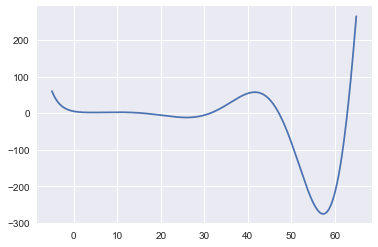

In [3]:
xs = np.arange(-5, 65, 0.1)
ys = np.array([f(x) for x in xs])

plt.plot(xs, ys)

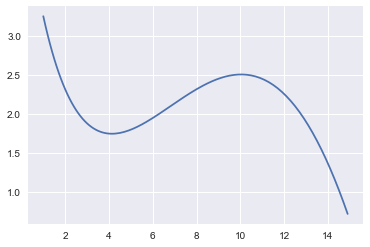

In [4]:
xs = np.arange(1, 15, 0.1)
ys = np.array([f(x) for x in xs])

plt.plot(xs, ys)

In [5]:
from scipy import linalg

def getA(xs, n):
    powers = np.arange(0, n + 1)
    return np.array([[x**p for p in powers] for x in xs], dtype=np.float32)

def getPolynomial(xs):
    n = len(xs) - 1
    A = getA(xs, n)
    b = np.array([f(x) for x in xs])
    return linalg.solve(A, b)

getPolynomial([1, 4, 15])

array([ 3.86850246, -0.64490942,  0.02862382])

In [13]:
def approx(xs_approx, xs):
    n = len(xs_approx) - 1

    ys = np.array([f(x) for x in xs])
    
    polynomial = getPolynomial(xs_approx)
    ys_approx = np.matmul(getA(xs, n), polynomial)

    plt.plot(xs, ys, xs, ys_approx)
    print(linalg.norm(ys - ys_approx))
    
    return polynomial

15.7108140525293


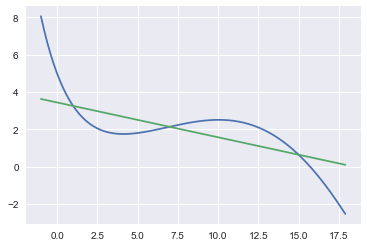

In [11]:
xs_approx = [1, 15]
xs = np.arange(-1, 18, 0.1)

approx(xs_approx, xs)

15.499751513983938


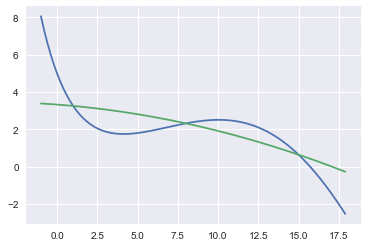

In [12]:
xs_approx = [1, 8, 15]
xs = np.arange(-1, 18, 0.1)

approx(xs_approx, xs)

2.681992946118233


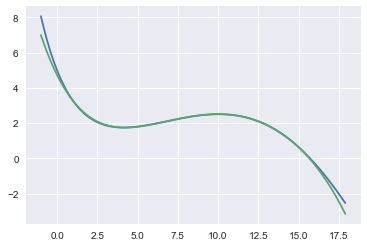

In [9]:
xs_approx = [1, 4, 7, 10, 12, 15]
xs = np.arange(-1, 18, 0.1)

approx(xs_approx, xs)

___

## Submission

6.604997149140633
4.362641535118072 -1.2955258656948436 0.1933368470215116 -0.008235651173320552


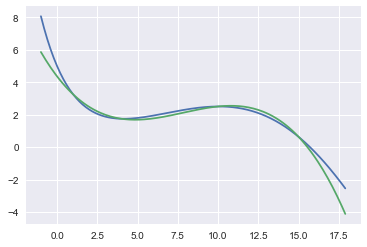

In [17]:
xs_approx = [1, 4, 10, 15]
xs = np.arange(-1, 18, 0.1)

polynomial = approx(xs_approx, xs)

with open('out/04. submission.txt', 'w') as f_out:
    output = ' '.join(map(str, polynomial))    
    print(output)
    f_out.write(output)